1. Gerekli Kütüphanelerin Yüklenmesi

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


2. Veri Setinin Yüklenmesi ve İlk İnceleme

In [6]:
# Veri setini yükleme
heart_df = pd.read_csv('heart.csv')

# Veri setinin ilk 5 satırını görüntüleme
print("Veri Setinin İlk 5 Satırı:")
display(heart_df.head().style.background_gradient(cmap='Blues'))

# Veri seti hakkında genel bilgiler
print("\nVeri Seti Bilgileri:")
print(f"Satır Sayısı: {heart_df.shape[0]}")
print(f"Sütun Sayısı: {heart_df.shape[1]}")
print("\nSütun İsimleri ve Veri Tipleri:")
display(heart_df.dtypes.to_frame(name='Veri Tipi').style.background_gradient(cmap='Purples'))

Veri Setinin İlk 5 Satırı:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.000000,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.100000,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.600000,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.000000,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.900000,1,3,2,0



Veri Seti Bilgileri:
Satır Sayısı: 1025
Sütun Sayısı: 14

Sütun İsimleri ve Veri Tipleri:


,Veri Tipi
age,int64
sex,int64
cp,int64
trestbps,int64
chol,int64
fbs,int64
restecg,int64
thalach,int64
exang,int64
oldpeak,float64


3. Eksik Veri Kontrolü ve Temizlik


Eksik Veri Analizi:


,Eksik Veri Sayısı,Eksik Veri Oranı (%)
age,0,0.000000
sex,0,0.000000
cp,0,0.000000
trestbps,0,0.000000
chol,0,0.000000
fbs,0,0.000000
restecg,0,0.000000
thalach,0,0.000000
exang,0,0.000000
oldpeak,0,0.000000


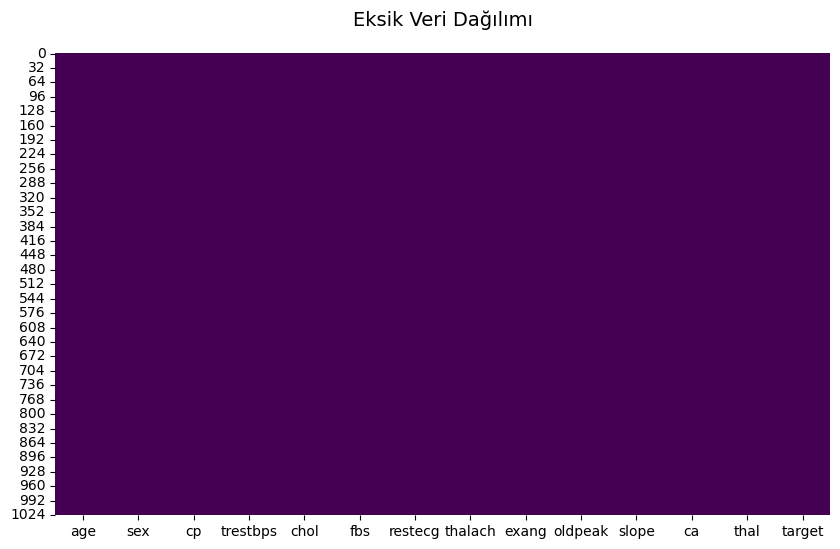

In [7]:
# Eksik veri kontrolü
missing_data = heart_df.isnull().sum().to_frame(name='Eksik Veri Sayısı')
missing_data['Eksik Veri Oranı (%)'] = (missing_data['Eksik Veri Sayısı'] / len(heart_df)) * 100

print("\nEksik Veri Analizi:")
display(missing_data.style.background_gradient(cmap='Reds', subset=['Eksik Veri Sayısı']))

# Eksik veri görselleştirme
plt.figure(figsize=(10, 6))
sns.heatmap(heart_df.isnull(), cbar=False, cmap='viridis')
plt.title('Eksik Veri Dağılımı', fontsize=14, pad=20)
plt.show()

# Eksik veri doldurma veya silme (örnek)
# heart_df.fillna(heart_df.mean(), inplace=True)  # Sayısal sütunlarda ortalama ile doldurma
# heart_df.dropna(inplace=True)  # Eksik verileri silme

4. Temel İstatistiksel Analiz

In [10]:
# Veri tipi kontrolü ile
numeric_cols = heart_df.select_dtypes(include=['int64', 'float64']).columns
numeric_stats = heart_df[numeric_cols].describe().T

print("\nSayısal Sütunların Temel İstatistikleri:")
display(numeric_stats.style.background_gradient(cmap='Greens', subset=['mean', 'std', '50%']))


Sayısal Sütunların Temel İstatistikleri:


,count,mean,std,min,25%,50%,75%,max
age,1025.000000,54.434146,9.072290,29.000000,48.000000,56.000000,61.000000,77.000000
sex,1025.000000,0.695610,0.460373,0.000000,0.000000,1.000000,1.000000,1.000000
cp,1025.000000,0.942439,1.029641,0.000000,0.000000,1.000000,2.000000,3.000000
trestbps,1025.000000,131.611707,17.516718,94.000000,120.000000,130.000000,140.000000,200.000000
chol,1025.000000,246.000000,51.592510,126.000000,211.000000,240.000000,275.000000,564.000000
fbs,1025.000000,0.149268,0.356527,0.000000,0.000000,0.000000,0.000000,1.000000
restecg,1025.000000,0.529756,0.527878,0.000000,0.000000,1.000000,1.000000,2.000000
thalach,1025.000000,149.114146,23.005724,71.000000,132.000000,152.000000,166.000000,202.000000
exang,1025.000000,0.336585,0.472772,0.000000,0.000000,0.000000,1.000000,1.000000
oldpeak,1025.000000,1.071512,1.175053,0.000000,0.000000,0.800000,1.800000,6.200000


5. Kategorik Değişkenlerin Analizi


Kategorik Değişkenlerin Dağılımı:


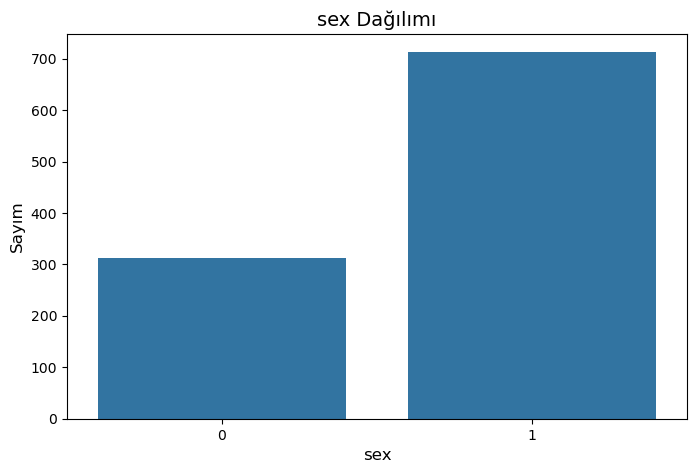


sex Değişkeni Frekans Tablosu:


,count
sex,
1,713
0,312


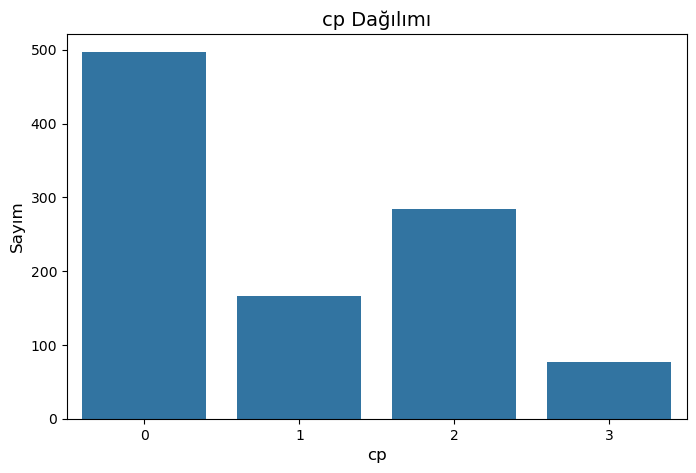


cp Değişkeni Frekans Tablosu:


,count
cp,
0,497
2,284
1,167
3,77


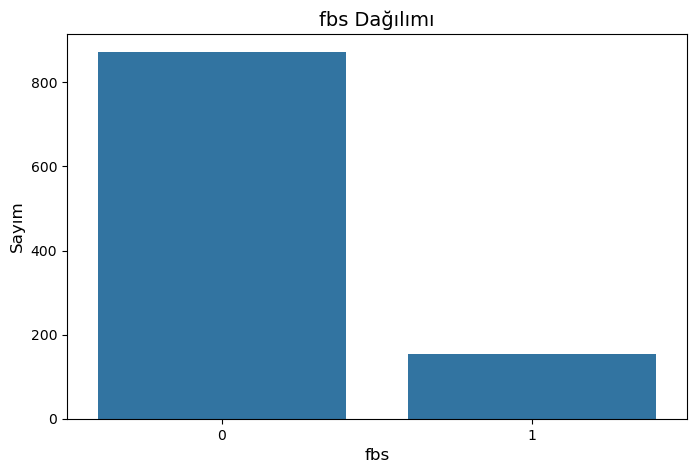


fbs Değişkeni Frekans Tablosu:


,count
fbs,
0,872
1,153


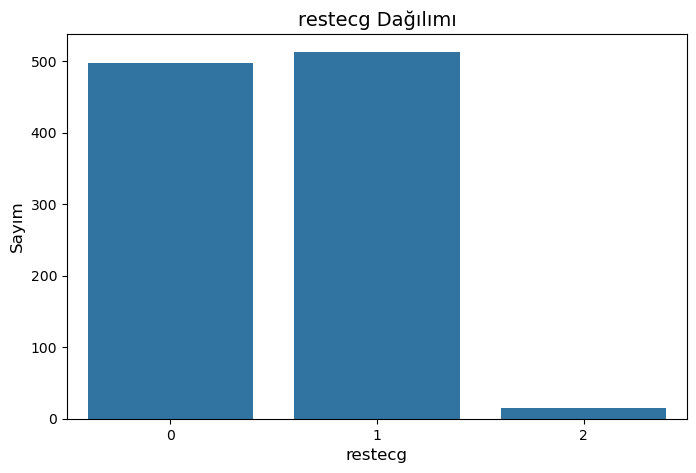


restecg Değişkeni Frekans Tablosu:


,count
restecg,
1,513
0,497
2,15


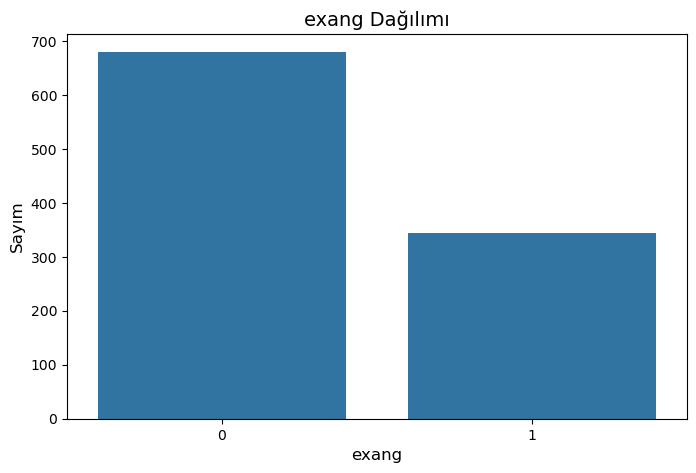


exang Değişkeni Frekans Tablosu:


,count
exang,
0,680
1,345


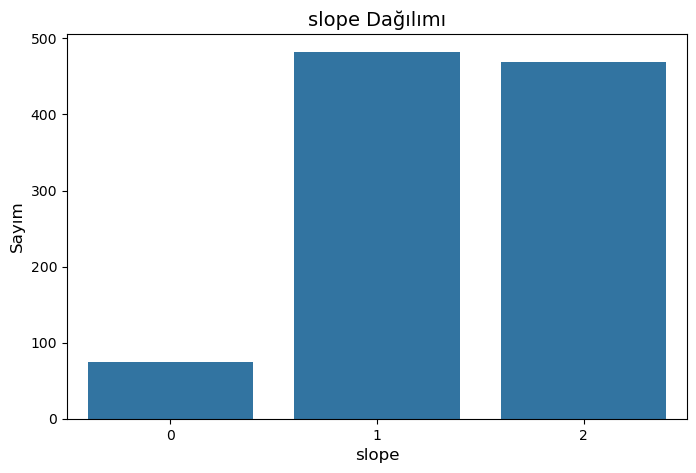


slope Değişkeni Frekans Tablosu:


,count
slope,
1,482
2,469
0,74


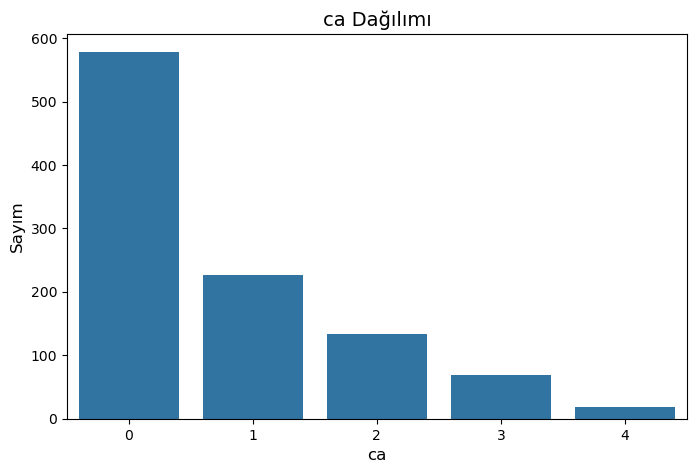


ca Değişkeni Frekans Tablosu:


,count
ca,
0,578
1,226
2,134
3,69
4,18


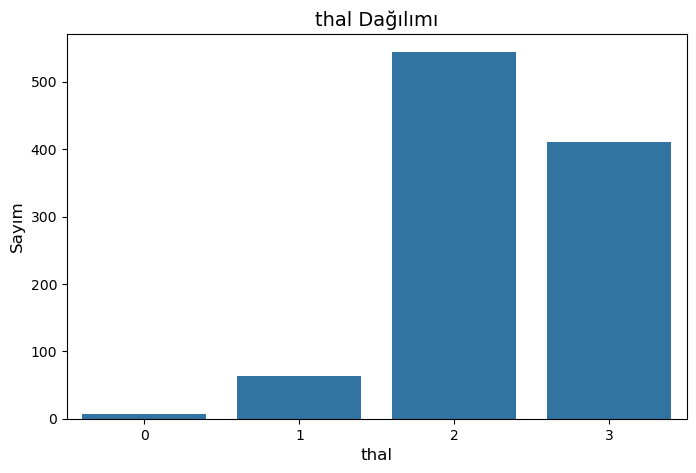


thal Değişkeni Frekans Tablosu:


,count
thal,
2,544
3,410
1,64
0,7


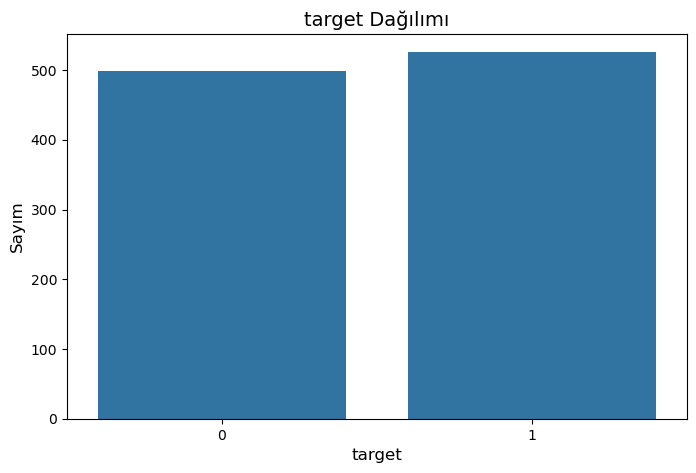


target Değişkeni Frekans Tablosu:


,count
target,
1,526
0,499


In [11]:
# Kategorik sütunların analizi
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

print("\nKategorik Değişkenlerin Dağılımı:")
for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=heart_df, x=col)
    plt.title(f'{col} Dağılımı', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Sayım', fontsize=12)
    plt.show()
    
    print(f"\n{col} Değişkeni Frekans Tablosu:")
    display(heart_df[col].value_counts().to_frame().style.background_gradient(cmap='Oranges'))

6. Hedef Değişken (Target) Analizi

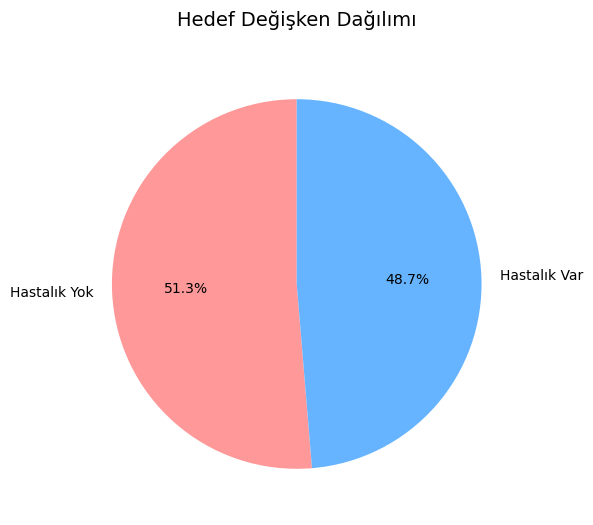

C:\Users\canem\AppData\Local\Temp\ipykernel_16768\3962553295.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=heart_df, x='target', y='age', palette='Set2')


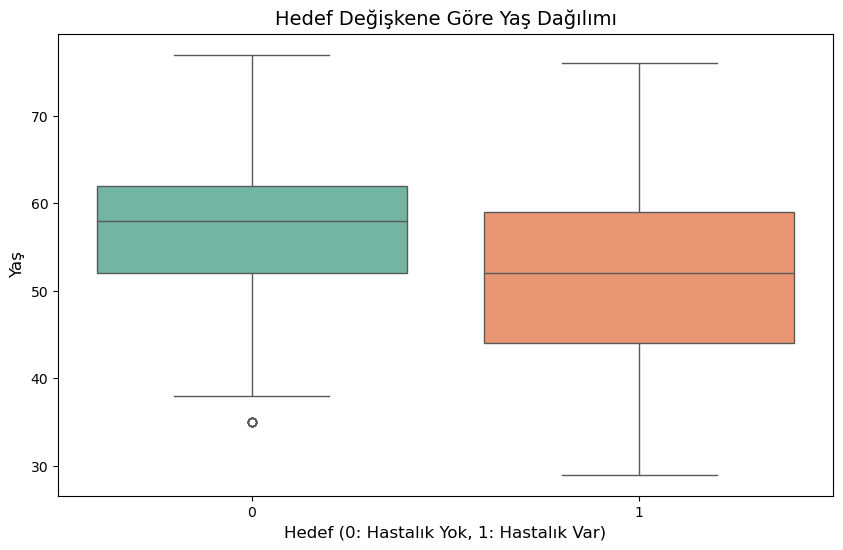

In [12]:
# Hedef değişkenin dağılımı
plt.figure(figsize=(8, 6))
target_counts = heart_df['target'].value_counts()
plt.pie(target_counts, labels=['Hastalık Yok', 'Hastalık Var'], 
        autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title('Hedef Değişken Dağılımı', fontsize=14, pad=20)
plt.show()

# Hedef değişkene göre yaş dağılımı
plt.figure(figsize=(10, 6))
sns.boxplot(data=heart_df, x='target', y='age', palette='Set2')
plt.title('Hedef Değişkene Göre Yaş Dağılımı', fontsize=14)
plt.xlabel('Hedef (0: Hastalık Yok, 1: Hastalık Var)', fontsize=12)
plt.ylabel('Yaş', fontsize=12)
plt.show()

7. Korelasyon Analizi

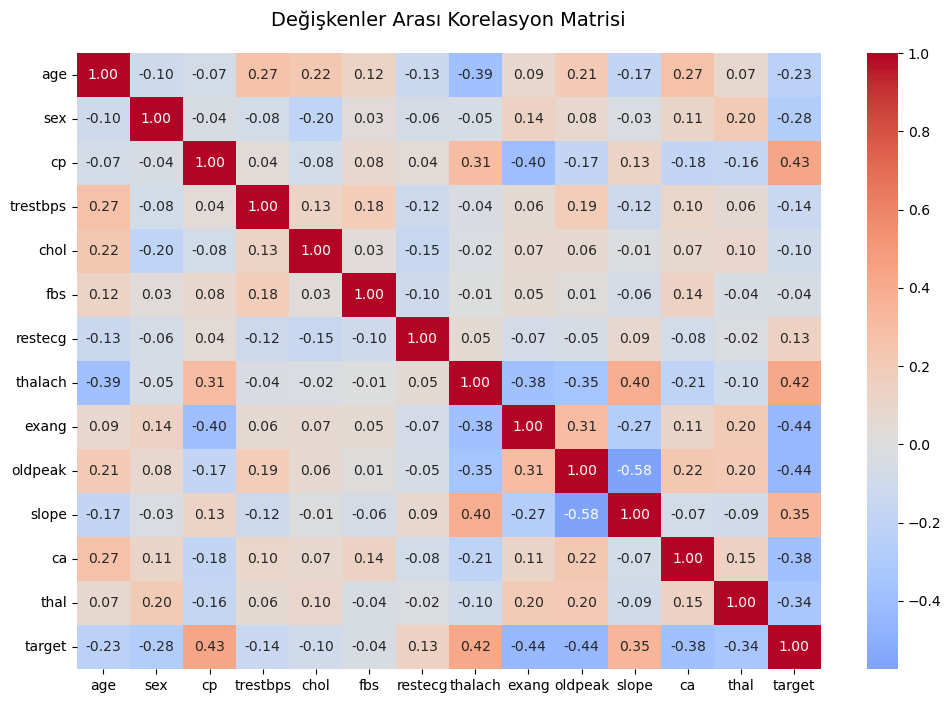


Hedef Değişkenle En Yüksek Korelasyona Sahip Değişkenler:


,Korelasyon
cp,0.434854
thalach,0.422895
slope,0.345512
restecg,0.134468
fbs,-0.041164


In [13]:
# Korelasyon matrisi
plt.figure(figsize=(12, 8))
corr_matrix = heart_df.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Değişkenler Arası Korelasyon Matrisi', fontsize=14, pad=20)
plt.show()

# Hedef değişkenle en yüksek korelasyona sahip 5 değişken
print("\nHedef Değişkenle En Yüksek Korelasyona Sahip Değişkenler:")
display(corr_matrix['target'].sort_values(ascending=False)[1:6].to_frame(name='Korelasyon').style.background_gradient(cmap='coolwarm'))

8. Önemli Bulguların Özeti

In [14]:
print("\nÖNEMLİ BULGULAR:")
print(f"1. Veri setinde toplam {heart_df.shape[0]} gözlem ve {heart_df.shape[1]} özellik bulunmaktadır.")
print(f"2. Veri setinde eksik veri bulunmamaktadır.")
print(f"3. Hedef değişken dağılımı: {target_counts[0]} sağlıklı, {target_counts[1]} hasta birey")
print("4. En yüksek pozitif korelasyon: thalach (maksimum kalp atış hızı)")
print("5. En yüksek negatif korelasyon: exang (egzersize bağlı göğüs ağrısı)")


ÖNEMLİ BULGULAR:
1. Veri setinde toplam 1025 gözlem ve 14 özellik bulunmaktadır.
2. Veri setinde eksik veri bulunmamaktadır.
3. Hedef değişken dağılımı: 499 sağlıklı, 526 hasta birey
4. En yüksek pozitif korelasyon: thalach (maksimum kalp atış hızı)
5. En yüksek negatif korelasyon: exang (egzersize bağlı göğüs ağrısı)
